# Insurance Data Analysis Pipeline

This notebook demonstrates how to use the `DataCleaner` class and inline EDA functions for comprehensive data analysis.

## 1. Setup and Imports

In [1]:
import sys
from pathlib import Path

# Add scripts directory to path
sys.path.insert(0, str(Path.cwd().parent / 'scripts'))

from clean_data import DataCleaner
from eda_inline import (
    show_data_summary,
    show_missing_values,
    show_descriptive_stats,
    show_distributions,
    show_outliers,
    show_correlation,
    show_scatter,
    show_group_analysis,
    show_temporal_trends,
    run_full_inline_analysis
)

import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# For better display in notebooks
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

## 2. Data Cleaning

Use the `DataCleaner` class to load and clean the raw data.

The cleaned data will be saved in the same directory as the raw data with a `_cleaned` suffix.

In [2]:
# Initialize the DataCleaner
cleaner = DataCleaner()

# Process the data file
# This saves to data/MachineLearningRating_v3_cleaned.csv
df = cleaner.process_file(
    input_path="../data/MachineLearningRating_v3.txt",
    save_to_cleaned=True
)

print(f"\nCleaned data shape: {df.shape}")

✓ Loaded 1,000,098 rows from MachineLearningRating_v3.txt

=== Starting Data Cleaning ===
✓ Converted 12 columns to numeric
✓ Normalized 2 date columns to %Y-%m-%d
✓ Calculated LossRatio for 618,464 rows
=== Data Cleaning Complete ===

✓ Saved cleaned data to ..\data\MachineLearningRating_v3_cleaned.csv

Cleaned data shape: (1000098, 53)


### Alternative: Load already cleaned data

In [6]:
# If you've already cleaned the data, you can load it directly
# df = pd.read_csv("../data/MachineLearningRating_v3_cleaned.csv")

## 3. Exploratory Data Analysis (EDA)

All EDA results will be displayed inline in this notebook. No files will be saved.

### Option 1: Run Full Analysis (Automated)


COMPREHENSIVE EDA ANALYSIS
DATA STRUCTURE SUMMARY

Shape: 1,000,098 rows × 53 columns

Data Types:
object     41
Float64    12
Name: count, dtype: int64

First few rows:


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,MaritalStatus,Gender,Country,Province,PostalCode,MainCrestaZone,SubCrestaZone,ItemType,mmcode,VehicleType,RegistrationYear,make,Model,Cylinders,cubiccapacity,kilowatts,bodytype,NumberOfDoors,VehicleIntroDate,CustomValueEstimate,AlarmImmobiliser,TrackingDevice,CapitalOutstanding,NewVehicle,WrittenOff,Rebuilt,Converted,CrossBorder,NumberOfVehiclesInFleet,SumInsured,TermFrequency,CalculatedPremiumPerTerm,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims,LossRatio
0,145249,12827,2015-03-01,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150,Passenger Vehicle,2004.0,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,2002-06-01,119300.0,Yes,No,119300.0,More than 6 months,NaN,NaN,NaN,NaN,<NA>,0.01,Monthly,25.0,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0,0.0
1,145249,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150,Passenger Vehicle,2004.0,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,2002-06-01,119300.0,Yes,No,119300.0,More than 6 months,NaN,NaN,NaN,NaN,<NA>,0.01,Monthly,25.0,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0,0.0
2,145249,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150,Passenger Vehicle,2004.0,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,2002-06-01,119300.0,Yes,No,119300.0,More than 6 months,NaN,NaN,NaN,NaN,<NA>,0.01,Monthly,25.0,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.0,0.0,<NA>
3,145255,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150,Passenger Vehicle,2004.0,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,2002-06-01,119300.0,Yes,No,119300.0,More than 6 months,NaN,NaN,NaN,NaN,<NA>,119300.0,Monthly,584.6468,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.84807,0.0,0.0
4,145255,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150,Passenger Vehicle,2004.0,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,2002-06-01,119300.0,Yes,No,119300.0,More than 6 months,NaN,NaN,NaN,NaN,<NA>,119300.0,Monthly,584.6468,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.0,0.0,<NA>



Memory Usage: 2638.18 MB

MISSING VALUES ASSESSMENT

Top 30 columns with missing values:


,Missing_Count,Missing_Percentage
NumberOfVehiclesInFleet,1000098,100.00
CrossBorder,999400,99.93
CustomValueEstimate,779642,77.96
WrittenOff,641901,64.18
Converted,641901,64.18
Rebuilt,641901,64.18
LossRatio,381634,38.16
NewVehicle,153295,15.33
Bank,145961,14.59
AccountType,40232,4.02



DESCRIPTIVE STATISTICS

Numeric Column Statistics:


,count,mean,std,min,25%,50%,75%,max,skewness
TotalPremium,1000098.0,61.905496,230.284513,-782.576754,0.0,2.178333,21.929825,65282.603421,138.596458
TotalClaims,1000098.0,64.86119,2384.074695,-12002.412281,0.0,0.0,0.0,393092.105263,69.933118
CustomValueEstimate,220456.0,225531.129942,564515.749848,20000.0,135000.0,220000.0,280000.0,26550000.0,40.870518
SumInsured,1000098.0,604172.732589,1508331.837996,0.01,5000.0,7500.0,250000.0,12636200.0,2.548565



DISTRIBUTION PLOTS

TotalPremium:


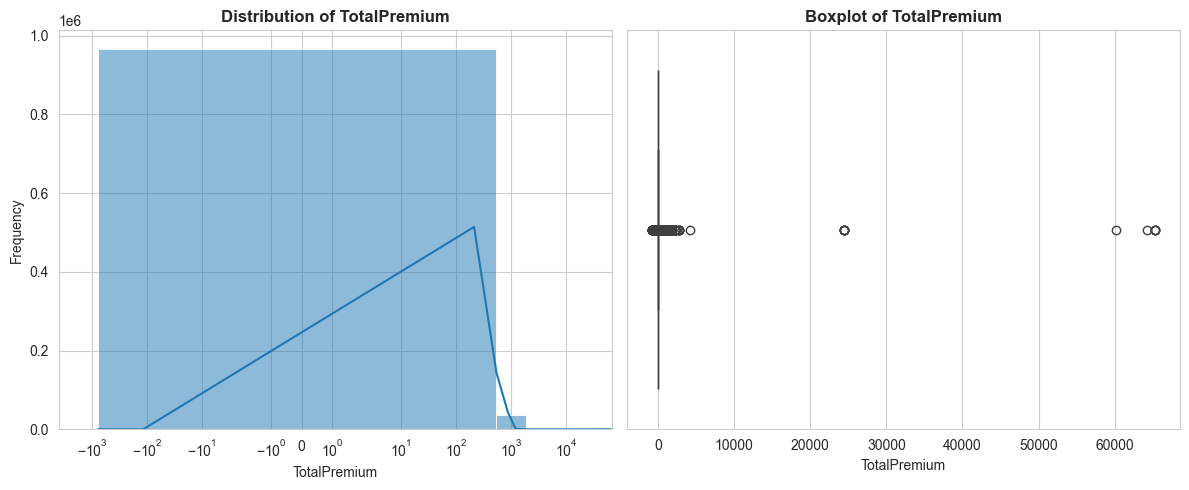


TotalClaims:


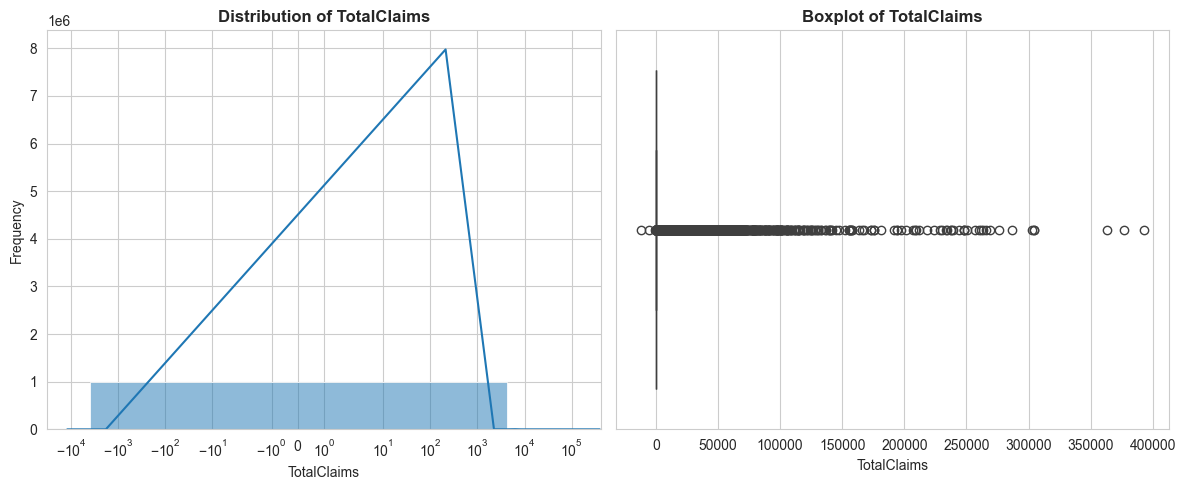


CustomValueEstimate:


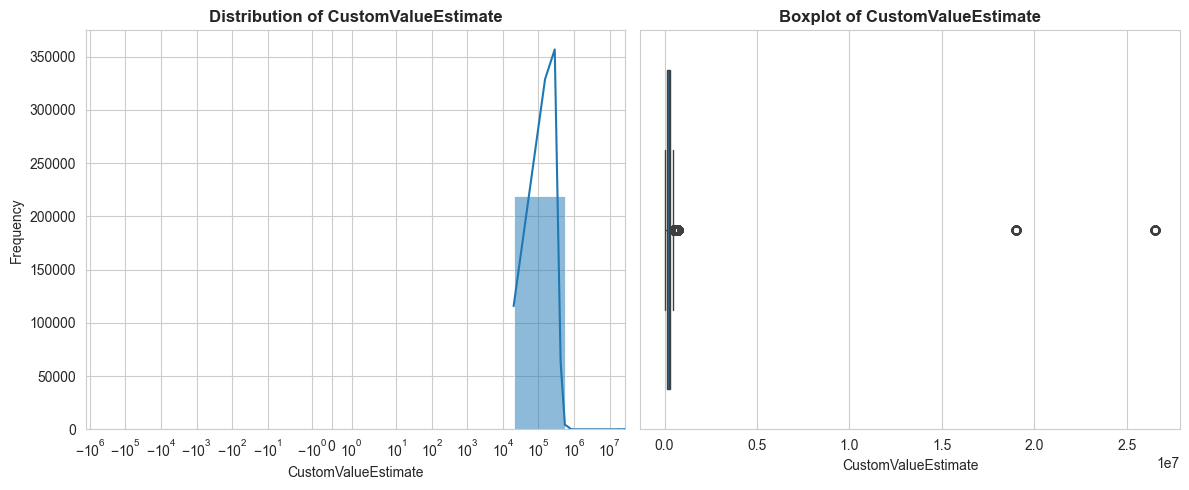


SumInsured:


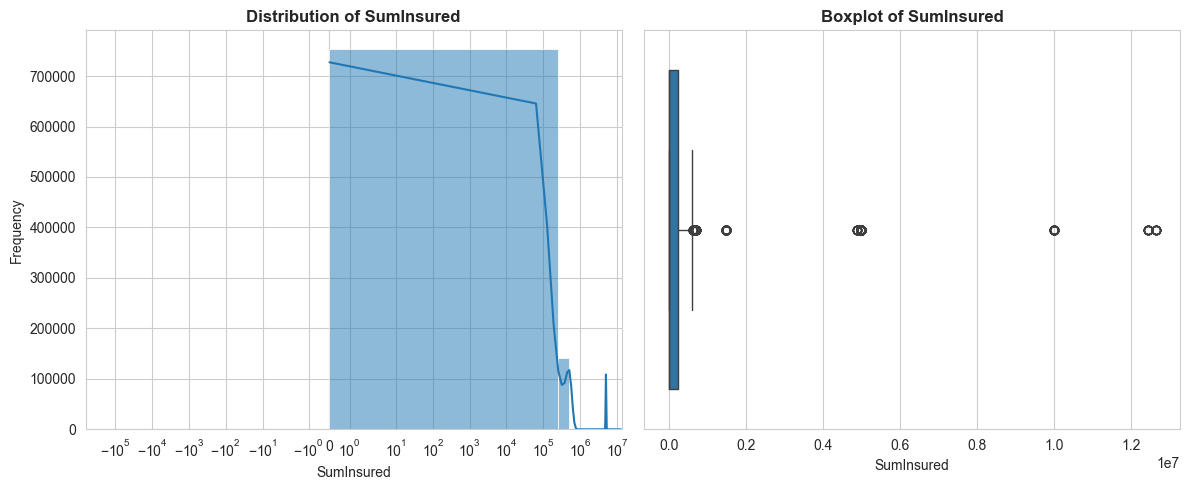


OUTLIER DETECTION

TotalPremium - Outlier Detection (IQR method):
  IQR Outliers: 209,042 (20.90%)

TotalPremium - Outlier Detection (ZSCORE method):
  Z-score Outliers (|z| > 3.0): 12,470 (1.25%)

TotalClaims - Outlier Detection (IQR method):
  IQR Outliers: 2,793 (0.28%)

TotalClaims - Outlier Detection (ZSCORE method):
  Z-score Outliers (|z| > 3.0): 1,312 (0.13%)

CustomValueEstimate - Outlier Detection (IQR method):
  IQR Outliers: 1,785 (0.81%)

CustomValueEstimate - Outlier Detection (ZSCORE method):
  Z-score Outliers (|z| > 3.0): 129 (0.06%)

SumInsured - Outlier Detection (IQR method):
  IQR Outliers: 104,294 (10.43%)

SumInsured - Outlier Detection (ZSCORE method):
  Z-score Outliers (|z| > 3.0): 51 (0.01%)

CORRELATION ANALYSIS

Correlation Matrix:


,TotalPremium,TotalClaims,CustomValueEstimate,SumInsured
TotalPremium,1.000000,0.121588,0.019965,-0.041174
TotalClaims,0.121588,1.000000,0.000853,-0.005129
CustomValueEstimate,0.019965,0.000853,1.000000,-0.000213
SumInsured,-0.041174,-0.005129,-0.000213,1.000000


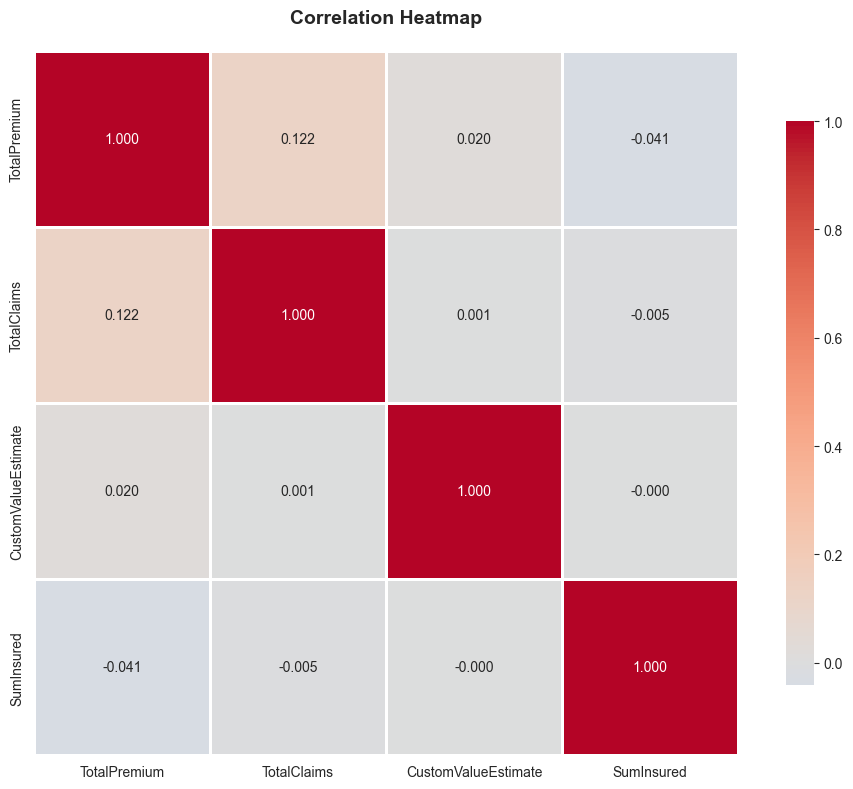


SCATTER PLOT: TotalPremium vs TotalClaims


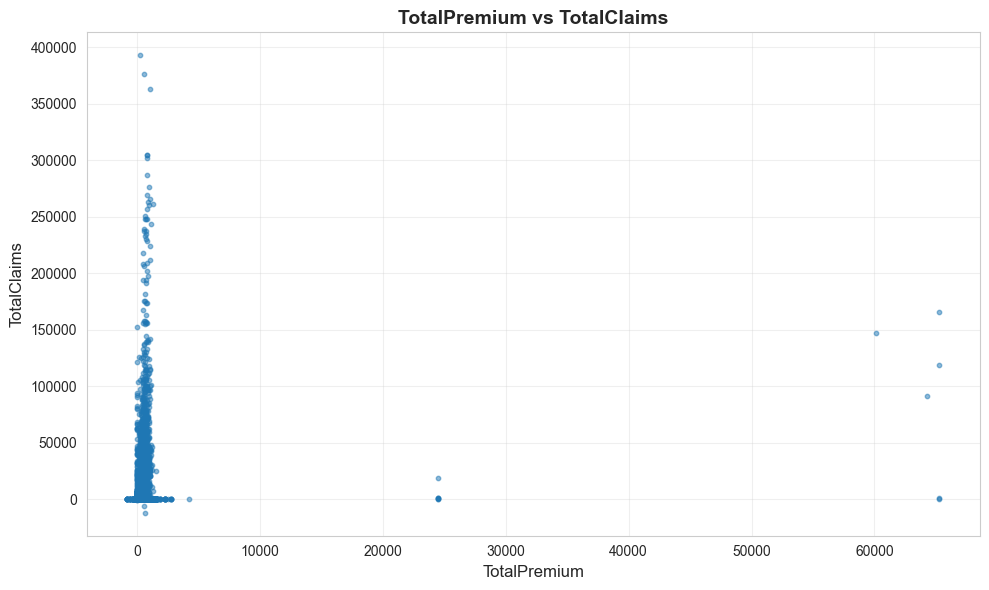


Correlation: 0.1216

GROUP-LEVEL KPI ANALYSIS

Province - Top 10 by Loss Ratio:


,policies,total_premium,total_claims,loss_ratio
Province,,,,
Gauteng,393865,24053774.58269,29394148.476842,1.222018
Kwazulu-Natal,169781,13209079.812203,14301382.449298,1.082693
Western Cape,170796,9806558.528868,10389773.736491,1.059472
North West,143287,7490508.178516,5920249.995088,0.790367
Mpumalanga,52718,2836291.942653,2044675.357895,0.720897
Free State,8099,521363.244991,354922.27193,0.680758
Limpopo,24836,1537324.499402,1016476.710526,0.661199
Eastern Cape,30336,2140103.833435,1356426.66386,0.633813
Northern Cape,6380,316558.073674,89490.508772,0.282699



VehicleType - Top 10 by Loss Ratio:


,policies,total_premium,total_claims,loss_ratio
VehicleType,,,,
Heavy Commercial,7401,460947.862946,750474.583333,1.628112
Medium Commercial,53985,3922745.552383,4119866.901579,1.050251
Passenger Vehicle,933598,56642016.58492,59372069.675789,1.048198
Light Commercial,3897,260497.520424,60452.5,0.232066
Bus,665,58244.739658,7996.535088,0.137292



Gender - Top 10 by Loss Ratio:


,policies,total_premium,total_claims,loss_ratio
Gender,,,,
Not specified,940990,59202752.22305,62714103.069123,1.059311
Male,42817,1580142.796322,1396703.915614,0.88391
Female,6755,304480.552715,250246.098246,0.821879



TEMPORAL TREND ANALYSIS

Monthly Trends:


,policies,total_premium,total_claims,loss_ratio
TransactionMonth,,,,
2013-10-01,45,371.063512,0.0,0.0
2013-11-01,1196,21307.467009,50585.078947,2.374054
2013-12-01,1495,42484.748888,9283.385965,0.218511
2014-01-01,1827,54085.196865,12436.859649,0.229949
2014-02-01,2062,60788.43647,62989.307018,1.036205
2014-03-01,3466,98577.193147,322785.021579,3.274439
2014-04-01,6919,234274.337556,306863.592105,1.309847
2014-05-01,9484,375911.724808,518042.736667,1.378097
2014-06-01,11822,486219.395357,504536.396491,1.037672


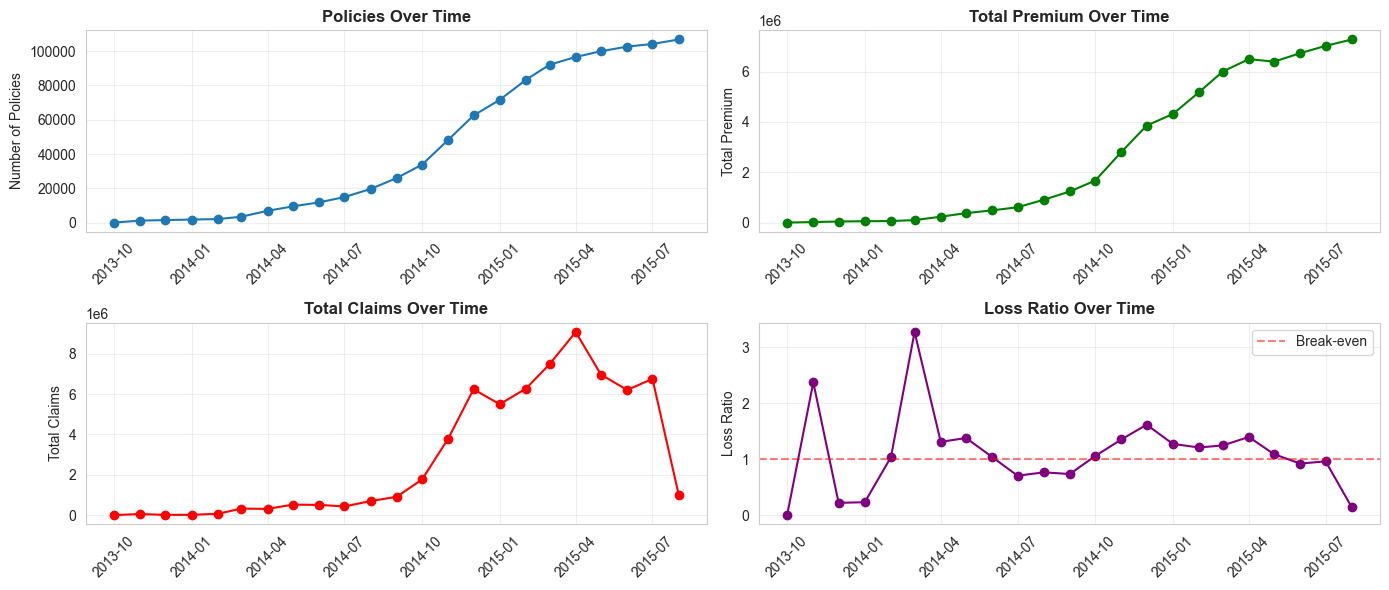


ANALYSIS COMPLETE


In [3]:
# Run complete EDA pipeline - displays everything inline
run_full_inline_analysis(df)

# This will:
# 1. Summarize data structure
# 2. Assess missing values
# 3. Generate descriptive statistics
# 4. Create distribution plots
# 5. Detect outliers
# 6. Perform correlation analysis
# 7. Create scatter plots
# 8. Analyze group-level KPIs
# 9. Perform temporal trend analysis

#### Group-Level KPI Analysis

In [4]:
# Analyze KPIs by different groups
show_group_analysis(df, group_cols=['Province', 'VehicleType', 'Gender'])


GROUP-LEVEL KPI ANALYSIS

Province - Top 10 by Loss Ratio:


,policies,total_premium,total_claims,loss_ratio
Province,,,,
Gauteng,393865,24053774.58269,29394148.476842,1.222018
Kwazulu-Natal,169781,13209079.812203,14301382.449298,1.082693
Western Cape,170796,9806558.528868,10389773.736491,1.059472
North West,143287,7490508.178516,5920249.995088,0.790367
Mpumalanga,52718,2836291.942653,2044675.357895,0.720897
Free State,8099,521363.244991,354922.27193,0.680758
Limpopo,24836,1537324.499402,1016476.710526,0.661199
Eastern Cape,30336,2140103.833435,1356426.66386,0.633813
Northern Cape,6380,316558.073674,89490.508772,0.282699



VehicleType - Top 10 by Loss Ratio:


,policies,total_premium,total_claims,loss_ratio
VehicleType,,,,
Heavy Commercial,7401,460947.862946,750474.583333,1.628112
Medium Commercial,53985,3922745.552383,4119866.901579,1.050251
Passenger Vehicle,933598,56642016.58492,59372069.675789,1.048198
Light Commercial,3897,260497.520424,60452.5,0.232066
Bus,665,58244.739658,7996.535088,0.137292



Gender - Top 10 by Loss Ratio:


,policies,total_premium,total_claims,loss_ratio
Gender,,,,
Not specified,940990,59202752.22305,62714103.069123,1.059311
Male,42817,1580142.796322,1396703.915614,0.88391
Female,6755,304480.552715,250246.098246,0.821879


#### Temporal Trend Analysis


TEMPORAL TREND ANALYSIS

Monthly Trends:


,policies,total_premium,total_claims,loss_ratio
TransactionMonth,,,,
2013-10-01,45,371.063512,0.0,0.0
2013-11-01,1196,21307.467009,50585.078947,2.374054
2013-12-01,1495,42484.748888,9283.385965,0.218511
2014-01-01,1827,54085.196865,12436.859649,0.229949
2014-02-01,2062,60788.43647,62989.307018,1.036205
2014-03-01,3466,98577.193147,322785.021579,3.274439
2014-04-01,6919,234274.337556,306863.592105,1.309847
2014-05-01,9484,375911.724808,518042.736667,1.378097
2014-06-01,11822,486219.395357,504536.396491,1.037672


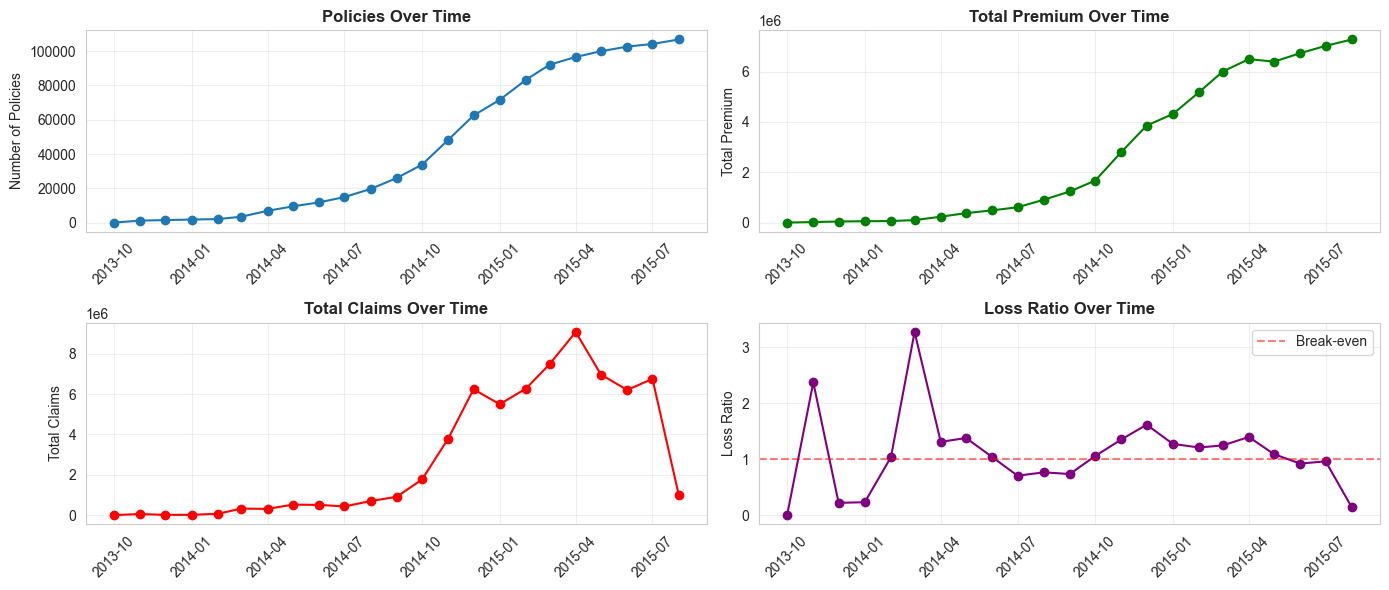

In [5]:
# Analyze trends over time
temporal_df = show_temporal_trends(df, date_col='TransactionMonth')

## 4. Custom Analysis

You can perform additional custom analysis using the cleaned DataFrame.

In [ ]:
# Example: Analyze loss ratio by province
province_analysis = df.groupby('Province').agg({
    'TotalPremium': 'sum',
    'TotalClaims': 'sum',
    'PolicyID': 'count'
})

province_analysis['LossRatio'] = (
    province_analysis['TotalClaims'] / province_analysis['TotalPremium']
)

province_analysis.sort_values('LossRatio', ascending=False)

## Summary

This notebook demonstrated:
1. **Data Cleaning**: Using `DataCleaner` to process and save cleaned data
2. **Analusis**: Using `analysis` functions to display analysis results directly in the notebook

The cleaned data is saved to: `data/MachineLearningRating_v3_cleaned.csv`